# How blockchain development as changed oevr time

- This interactive [Jupyter Notebook](https://tradingstrategy.ai/glossary/jupyter-notebook) researches the popularity and features of different blockchain software development experiences.
- The data research is done by analysing questions and answers on the world's number one programmer forum, StackOverflow.

For any updates and follows ups, [subscribe to the newsletter](https://tradingstrategy.ai/community) or [follow on Twitter](https://tradingstrategy.ai/community).

For any questions, [come to Trading Strategy Discord](https://discord.com/invite/en8tW6MDtw).

## Executive summary

- This study focuses only on software development aspects, out of score are e.g. end users and fair value of cryptocurrencies
- Blockchain development popularity is in decline based on StackOverflow data
- [Ethereum Virtual Machine](https://tradingstrategy.ai/glossary/evm) based blockchains dominating, as expected
- Ethereum and [EVM-compatible blockchains](https://tradingstrategy.ai/glossary/evm-compatible) cannot be differetiate, as they are more or less [clones](https://tradingstrategy.ai/glossary/clone) 
  and do not offer unique selling points for a software developer
- Solana is ~1/6th of EVM popularity, surprisingly high
- Next runner ups are NEAR protocol and Bitcoin
- We see two waves followed by cryptocurrency bull markets: 2018 and 2022. 
- The blocokchain development activity has returned to the same level it was before 2020 cryptocurrency market bull run.
- Bitcoin development interest has not changed over a decade - not dead, but nothing happening
- There are various alternative blockchain technologies that do not have taken off
  in the development popularity over the years.
- Private blockchains, Hyperledger, peaked 2018, in fact passed Ethereum, but 
  has been in decline ever since
- We see some positive, and somewhat surprising results, like activation

The data is not fully representative, as it focuses on a single forum, StackOverflow, of which popularity has declined over the years. Futhermore, [the datasets end in May 2023](https://news.ycombinator.com/item?id=37360026). We assume StackOverflow stopped published datasets and is likely 
trying to figure out how to charge AI companies for downloading the data. Although promised to continue, there has not been
any updates on the matter.

This notebook also serves as a best practices example on data resaerch using [Python](https://tradingstrategy.ai/glossary/python), [Jupyter](https://tradingstrategy.ai/glossary/jupyter-notebook) and [Pandas](https://tradingstrategy.ai/glossary/pandas).


## Preface

This little research was created in order to answer the question "do there exist viable blockchain development outside EVM currently".

- This was done in the light of the recent incident of MakerDAO founder, one of the oldest Ethereum projects, [praising Solana](), the second most popular alternative for [Ethereum Virtual Machine](https://tradingstrategy.ai/glossary/evm) ecosystem
- [Drama ensued](https://decrypt.co/154834/vitalik-buterin-sells-mkr-tokens-as-makerdao-co-founder-pushes-for-solana-based-newchain/)
- This was also done out of the curiosity to see if "blockchain and cryptocurrencies are dead"


## Usage and initialisation

Here we start setting up our interactive notebook.

- Using data files supplied with Github repository
- [For full usage instructions, see README](./README.md)

In [6]:
import pandas as pd

from blockchain_stackoverflow import entertain_me
from blockchain_stackoverflow.helpers import clip_to_data_available_period


# Initialise notebook output
entertain_me()  

# Load our data
try:
    df = pd.read_parquet("blockchain-questions.parquet")
except OSError as e:
    raise RuntimeError(f"Did you remember to run git lfs checkout") from e

df = clip_to_data_available_period(df)

print(f"The dataset has total {len(df):,} blockchain related posts")

The dataset has total 29,539 blockchain related posts


## About StackOverflow and its data

StackOverflow is, and has been, the number one software development questions and answers forum for over a decade.

- We know the popularity of StackOverflow is in decline, and [it has been declining for many years before the AI boom started](https://observablehq.com/@ayhanfuat/the-fall-of-stack-overflow).
- Decline is caused by
    - [The inbound of low-quality users with low-quality questions flooding the forum](https://meta.stackexchange.com/questions/56817/can-we-prevent-some-of-the-low-quality-questions-from-entering-our-system)
      and turning off people who have the interest and knowledge to answer the questions
    - [Toxic moderation](https://medium.com/codex/its-time-for-stack-overflow-to-address-its-moderation-problems-6111e45b6e94)
    - Toxis moderation seems to be especially an issue with cryptocurrencies, as people vote down questions for their own ideological reasons
- StackOverflow posting is down 50% of an all-time high in 2015, back to 2011 levels
- Below, we check if the overall decline of StackOverflow popularity has any significance for our analysis. Any effect seems to be minor.


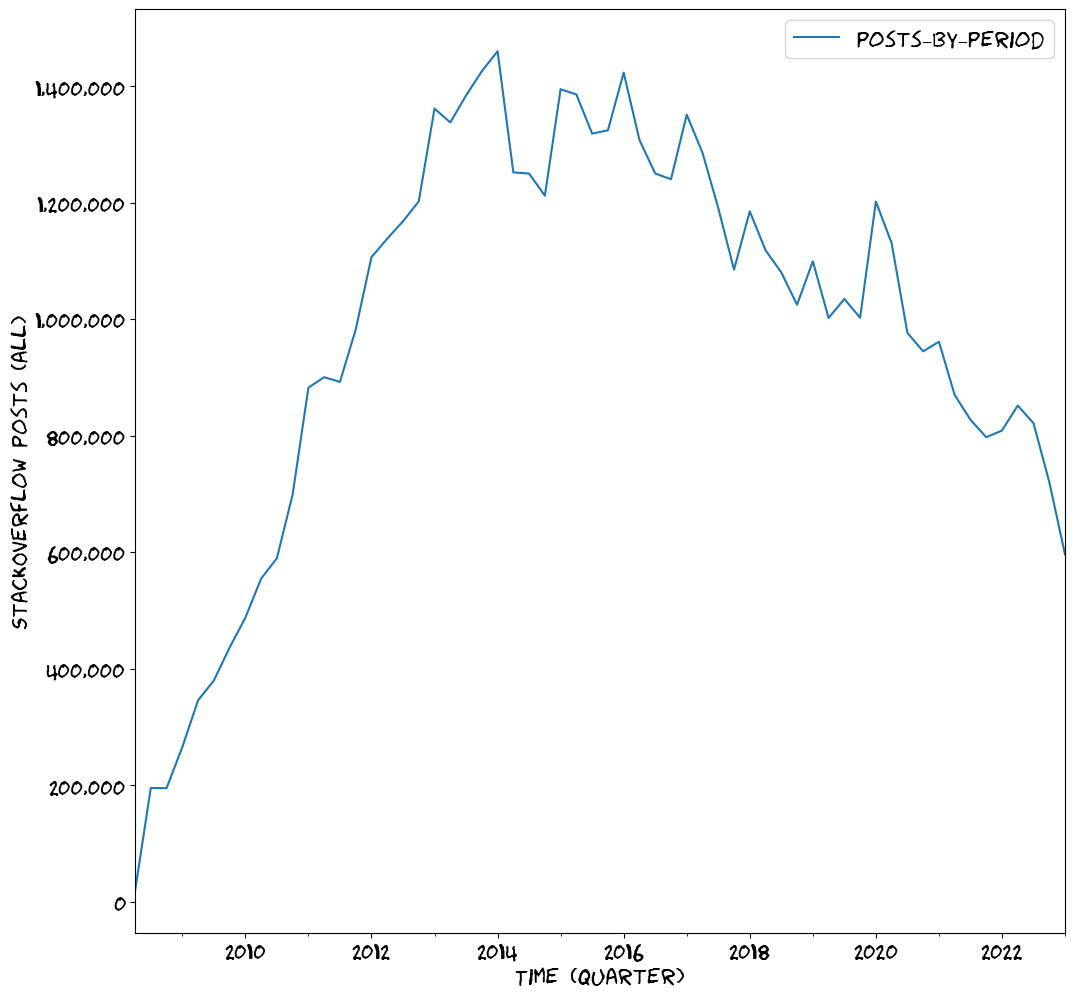

In [7]:
import matplotlib.pyplot as pyplot

from blockchain_stackoverflow.helpers import axis_formatter_with_separator

all_posts_quarterly = pd.read_parquet("post_counts_quarterly.parquet")
all_posts_quarterly = all_posts_quarterly[:pd.Timestamp("2023-05-31")]

#with pyplot.xkcd():
ax = all_posts_quarterly.plot.line()
ax.set_xlabel("Time (quarter)")
ax.set_ylabel("StackOverflow posts (all)")
ax.get_yaxis().set_major_formatter(axis_formatter_with_separator)


## Alternative datasets

Some blockchain ecosystems have their own [StackExchange sites](https://en.wikipedia.org/wiki/Stack_Exchange).
A StackExchange site is similar to StackOverflow main site, but for a particular topic and
not exclusive to the software development.

- Other StackExchange posts represent end-user questions along with software developer questions
- These datasets were not used due to lack of time, as analysis the data would require manually building tag maps of hundreds of tags
- Including [ethereum.stackexchange.com](https://ethereum.stackexchange.com) software development questions would likely increase Ethereum dominance by a factor of 5x - 10x 
  but might not be a good representation of early adopter interest
- We may publish more research notebooks on these datasets in the future, so please [follow us](https://tradingstrategy.ai/community)

Here is a short overview of different blockchain ecosystem StackExchange sites we are aware of

- [Ethereum](https://ethereum.stackexchange.com) - 60k questions
- [Bitcoin](https://bitcoin.stackexchange.com/) - 30k questions
- [Tezos](https://tezos.stackexchange.com/) - 2k questions
- [Substrate (Polkadot)](https://tezos.stackexchange.com/) - 4k questions
- Our StackOverflow-only dataset has ~30k questions

## More on data and what does it say

We believe StackOverlow represents **mainstream software development interest**. 
Although in decline, the 2023 data should still give a good proximation for this analysis.

For early communities, the interaction usually happens where the community founders are.
They often do not follow or answer questions on StackOverflow. Developers involved
know how to reach the founders and do not post on StackOverflow, as they know 
their questions would go unanswered there.

Furthermore, software development communities, both early and established, are increasingly using other tools to answer questions
- [Github Discussion](https://docs.github.com/en/discussions)
- [Discord Forum Channels](https://docs.github.com/en/discussions)
- [Discourse hosted forums](https://www.discourse.org/)

Because these mediums do not have such good structural data (tagging) or access (data dumps),
analysing software development interests from these sources is much harder.

## Benchmark of unrelated technologies

To understand the nature of the StackOverflow data better, we also plot some unrelated technologies and see how their popularity on StackOverflow has developed over time.

- Web frontend development technologies: jQuery, Angular, React, Vue.js, Svelte
- Database technologies: SQL, Firebase, MongoDB

Based on the insights we for example know that most Svelte related developer interactivity happens on a private Discord questions and answers forum.



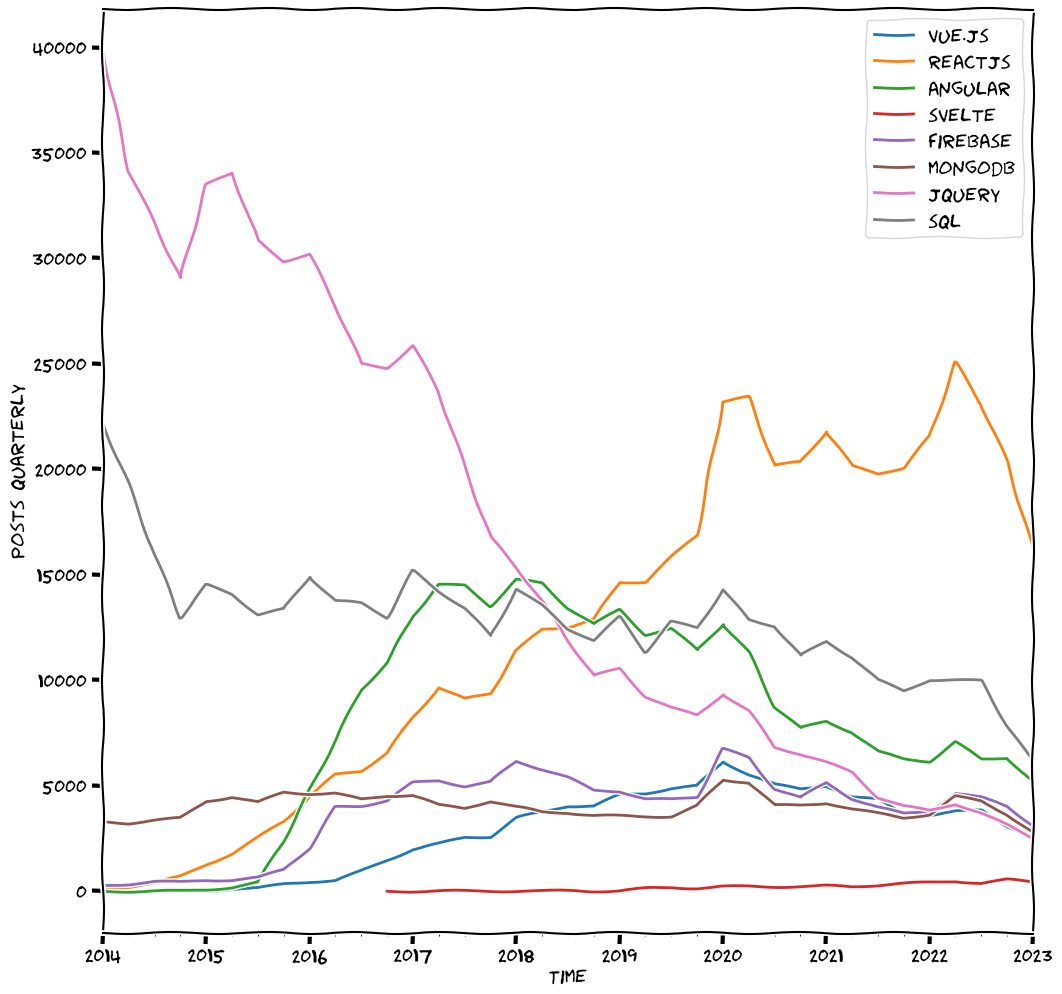

In [8]:
# Note: running this cell takes 1 minute to run 
# so you might want to disable it until the final 
# publication

from blockchain_stackoverflow.helpers import create_binned_df_by_tags
from blockchain_stackoverflow.tag_map import OTHER_TAGS

# comparison_df = pd.read_parquet("other-questions.parquet")
# comparison_df = clip_to_data_available_period(comparison_df)

# quaterly_binned = create_binned_df_by_tags(comparison_df, {
#     t: (t, ) for t in OTHER_TAGS
# })

# with pyplot.xkcd():
#     ax = quaterly_binned.plot.line()
#     ax.set_xlabel("Time")
#     ax.set_ylabel("Posts quarterly")

## Researched blockchain technology tags

Here is an overview of tags examined and their lifetime counts.



In [11]:
tags_df = pd.read_parquet("tags.parquet")
tags_df = tags_df.sort_values("Count", ascending=True)
ax = df.plot.barh(x="TagName", y="Count")

KeyError: 'Count'

## Blockchain questions data

- We have collected ~30k StackOverflow blockchain development related posts over a decade
- First posts were Bitcoin related
- After Ethereum mainnet become useable 2017, Ethereum has dominated blockchain development

In [ ]:
from blockchain_stackoverflow.helpers import bin_to_time

all_blockchain_posts = bin_to_time(df, frequency="QS")

with pyplot.xkcd():
    ax = all_blockchain_posts.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of blockchains posts quarterly")


KeyError: 'The grouper name CreationDate is not found'

## Top blockchains by developer interest

Plot the popularity of top three blockchains, as inferred from the domain-specific knowledge.

- Ethereum, Bitcoin, Solana and Near Protocol have so much developer interest that it does not make sense
  to plot them on the same scale with the other chains and other chains are plotted below

- Note that due to [EVM-compatible clones](https://tradingstrategy.ai/glossary/evm-compatible) it is impossible to distinguish Ethereum questions from e.g., Polygon and BNB SMart Chain questions, so the Ethereum category should be treated as 
  "all EVM blockchains"


In [ ]:


quaterly_binned = create_binned_df_by_tags(df, {
    "bitcoin": ("bitcoin", "bitcoind", "bitcoinj"),
    "near": ("nearprotocol", "near"),
    "ethereum": ("ethereum",),
    "solana": ("solana", "solana-cli"),
})

ax = quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Blockchain posts quarterly")

## Top blockchains by developer interest, adjuted to StackOverflow decline

- Here we present blockchain posts as % of overall posts of StackOverflow
- This corrects for the general trend of StackOverflow decline
- After adjustment, the blockchain interest downward trends corrects a bit, but this change is not significant



In [ ]:
# How many % of all SO.com question we are
adjusted_quaterly_binned = quaterly_binned.div(all_posts_quarterly["posts_by_period"], axis="index") * 100
adjusted_quaterly_binned = adjusted_quaterly_binned.loc[pd.Timestamp("2012-01-01"):]

In [ ]:

ax = adjusted_quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain posts - StackOverflow popularity adjusted")

# Kindlings blockchains

- Here, we analyse tags for blockchains that are gaining traction, have not yet gained traction, or did not gain meaningful traction in the past
- These are plotted on their own chart, as the Y-axis would be too skewed by the top blockchains
- As of 2023, **Hedera** seems to gain traction among developers
- **Tron**, despite the reputation of its infamous founder, enjoys developer interest - from other contexts we know this to be popular in Asia
- **Polkadot** made a lot of noise in the 2021 bull run but [has since become quieter](https://www.publish0x.com/cryptoeq/are-polkadot-dot-parachains-dead-xxzkwlw)

In [ ]:

quaterly_binned = create_binned_df_by_tags(df, {
    "polkadot": ("polkadot", "substrate", "polkadot-js"),
    "cardano": ("cardano",),
    "ripple": ("xrp", "rippled"),
    "stellar": ("stellar"),
    "eos": ("eos"),
    "radix": ("scrypto"),
    "aptos": ("aptos"),
    "sui": ("sui"),
    "cosmos": ("cosmos-sdk", "cosmwasm", "tendermint"),
    "multiversx": ("elrond",),
    "ton": ("ton",),
    "filecoin": ("filecoin",),
    "hedera": ("hedera", "hedera-hashgraph",),
    "tron": ("tron",),
})

with pyplot.xkcd():
    ax = quaterly_binned.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("StackOverflow posts per quarter")

# Generic blockchain tags

- Here we analyse the trends of generic blockchain development tags 
- These tags that cannot be associated with any blockchain or specific technology

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "blockchain": ("blockchain",),
        "smartcontracts": ("smartcontracts",),
        "nft": ("nft",),
        "cryptocurrency": ("cryptocurrency",),
        "solidity": ("solidity",),
        "decentralized-applications": ("decentralized-applications",),
        "web3": ("web3",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Deadchains

- Here, we compare blockchains that are likely little relevant today
- After the 2018 bull market, EOS had the best chance to become an alternative for the EVM ecosystem
- EOS failed not due to technical reasons, but because
  [Block.One, the company behind the original implementation and its founders decided to use raised capital for personal unrelated purposes](https://cointelegraph.com/news/eos-urges-to-reject-blockone-settlement)

In [ ]:
yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "litecoin": ("litecoin",),
        "stellar": ("stellar",),
        "ripple": ("xrp", "rippled"),
        "diem": ("diem",),
        "dogecoin": ("dogecoin-api",),
        "eos": ("eos",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

with pyplot.xkcd():
    ax = yearly_binned.plot.line()
    ax.set_xlabel("Time")
    ax.set_ylabel("StackOverflow posts per year")

# Centralised exchanges developer interest

- We compare centralised exchange API developer questions
- These questions are related to CEX APIs, automated trading, and trading bots
- This gives us a reference point to blockchain infrastructure and decentralised ecosystem comparison
- The X-axis is binned yearly because low activity on these questions

In [ ]:

yearly_binned = create_binned_df_by_tags(
    df, 
    {
        "binance": ("binance",),
        "coinbase": ("coinbase-api",),
        "kraken": ("kraken.com",),
    }, 
    frequency=pd.offsets.YearBegin(),
)

ax = yearly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per year")



# Binance Smart Chain vs. Ethereum

- Binance Smart Chain is a popular EVM-compatible clone chain due to push from Binance, that had at the writing of this 50% CEX market share
- We do the comparison by some  with Binance branded tags against their native Ethereum counterparts

In [ ]:

quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "erc20": ("erc20",),
        "bep20": ("bep20",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Uniswap vs. PancakeSwap

- Same as above
- Uniswap is Ethereum-centric, whereas PancakeSwap is Binance Smart Chain 
- PancakeSwap is the only Uniswap competitor with some meaningful mainstream developer ecosystem in 2023

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "pancakeswap": ("pancakeswap",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Fungible vs. non-fungible tokens

- Here we compare the popularity of NFTs against value transfer tokens

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "nft-related": ("nft", "metaplex", "opensea"),
        "token-related": ("erc20", "bep20", "uniswap"),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# JavaScript vs. Python vs. other programming languages

- Compare Ethereum integration libraries for various major programming languages
    - JavaScript
    - Python
    - Java
    - Dart
    - Go
- We see how the top two languages, JavaScript and Python, have integration library related questions


In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "javascript-integration": ("web3js", "ethers.js", "wagmi"),
        "python-integration": ("web3py", "brownie"),
        "java-integration": ("web3-java",),
        "dart-integration": ("web3dart",),
        "go-integration": ("go-ethereum",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# JavaScript Web3 frontend integration libraties

- What is the popularity of different Web3 frontend integration libraries

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "wagmi": ("wagmi",),
        "web3js": ("web3js",),
        "ethers.js": ("ethers.js",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# New smart contract programming languages

- How new smart contract programming languages are coming along
- We do not benchmark against Solidity as it would skew the axes
- With the launch of Aptos and Sui chains, originally developed
  for Facebook's Diem blockchain, Move is gaining in popularity this year
- AssemblyScript is used outside smart contracts, but it saw
  a blink of a popularity on Near blockchain



In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "move": ("move-lang",),
        "scrypto": ("scrypto",),
        "vyper": ("vyper",),
        "assemblyscript": ("assemblyscript",)
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Smart contract framework showdown

- Compare popularity of different smart contract development frameworks
- Foundry is taking over from Truffle and Hardhat
- Foundry is too new to be included here
- Foundry support is mostly kindling support on the community Telegram chat
- Brownie is now unmaintained and being replaced by Ape 
- Remix is included here, even though it's web IDE and not a framework per se

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "truffle": ("truffle",),
        "hardhat": ("hardhat",),
        "brownie": ("brownie",),
        "openzeppelin": ("openzeppelin",),
        "remix": ("remix",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Solana breakdown

- What are the various Solana sub-tags doing



In [ ]:
sol_sub_tags = [
    "solana-cli",
    "solana-transaction-instruction",
    "solana-program-library",
    "solana-web3js",
    "anchor-solana",
    "solana-py",    
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in sol_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Binance breakdown

- What's going on Binance Smart Chain



In [ ]:
bsc_sub_tags = [
    "bep20",
    "bsc",
    "binance-smart-chain",
]

quaterly_binned = create_binned_df_by_tags(
    df, 
    {tag: (tag,) for tag in bsc_sub_tags}, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Wallet related

- While MetaMask is not a programming interface, but a single implementation, 
  people tag their questions with it as they do not understand the difference
- New, mobile-friendly, WalletConnect interface has been in progress since 2021  

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "metamask": ("metamask",),
        "wallet-connect": ("wallet-connect",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Dapp related

- Benchmark some popular Dapps and protocols that are not blockchains themselves
- OpenSea is included here, although it is not a true decentralised application
  and do not have a developer community


In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "uniswap": ("uniswap",),
        "chainlink": ("chainlink",),
        "wallet-connect": ("wallet-connect",),
        "opeasea": ("opeasea",),
        "thegraph": ("thegraph",),
        "gnosis-safe": ("gnosis-safe",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")

# Private or public blockchain

- Hyperledger is the most well-known implementation used on private blockchains
- Private blockchain peaked 2018 and never recovered - enterprises
  are now looking to implement their use cases on public blockchains, subnets or similar

In [ ]:
quaterly_binned = create_binned_df_by_tags(
    df, 
    {
        "ethereum": ("ethereum",),
        "hyperledger": ("hyperledger", "hyperledger-fabric",),
    }, 
)

ax = quaterly_binned.plot.line()

ax.set_xlabel("Time")
ax.set_ylabel("StackOverflow posts per quarter")


- We also check how well our enterprise overlords answer to questions compared to the more community oriented public blockchain folks.
- Good answer to posts ratio is a sign of a healthy community
- We compare all blockchain questions, Ethereum and Hyperledger 
- As discussed earlier, StackOverflow is in decline and we can see this as well
  by having more and more questions going unanswered. Either questions are low quality
  (written unprofessionally) or people have stopped bothering answering for other reasons
- We see the quality of both Ethereum and Hyperledger communities degrading over time
- This is likely due to more low skilled developers entering the industry,
  whereas early on the community consists on professional developers only
- We also see spikes around the launches of Bitcoin and Ethereum communities,
  when the community was small and consisting only domain experts


In [ ]:
from blockchain_stackoverflow.helpers import bin_to_time_with_answers, get_posts_by_tags

hyperledger = get_posts_by_tags(df, ("hyperledger", "hyperledger-fabric",))
ethereum = get_posts_by_tags(df, ("ethereum",))

hyperledger_binned = bin_to_time_with_answers(hyperledger)
ethereum_binned = bin_to_time_with_answers(ethereum)
overall = bin_to_time_with_answers(df)

answer_ratios = pd.DataFrame({
    "ethereum": ethereum_binned["answer_to_posts_ratio"],
    "hyperledger": hyperledger_binned["answer_to_posts_ratio"],
    "all blockchain": overall["answer_to_posts_ratio"],
})

ax = answer_ratios.plot.line()

# Community developer relations health indicator

- We do answer to questions ratio check for every tag we have collected.
- We sort tags by healthiest (most answers to questions) to unheathy (questions go without answers).
- We do not do time analysis for trends, but just take the lifetime value for each tag.
- Hedera community seems to be doing an excellent job answering the questions.
- Some blue chip projects like **Uniswap**, **WalletConnect** and **FileCoin** have very low score, indicating that most questions go unaswered. These projects should likely invest more into the basic documentation and developer support.

In [ ]:

from blockchain_stackoverflow.tag_map import INTERESTING_TAGS

# tag -> answer ratio mappings
ratios = pd.Series(dtype="float")

for tag in INTERESTING_TAGS:
    posts = get_posts_by_tags(df, (tag,))
    question_count = len(posts)
    if question_count == 0:
        print(f"{tag} lacks any questions")
        continue
    answer_count = posts["AnswerCount"].sum()
    ratios[tag] = answer_count / question_count

ratios = ratios.sort_values()
ax = ratios.plot.barh(figsize=(15, 30,))

